In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd


Bài 1: 
Chọn ảnh quả kiwi bất kì .
Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới.
Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin.
Lưu ảnh kết quả vào file kiwi_wave.jpg

Đã lưu ảnh với hiệu ứng sóng: exercise/kiwi_wave.jpg


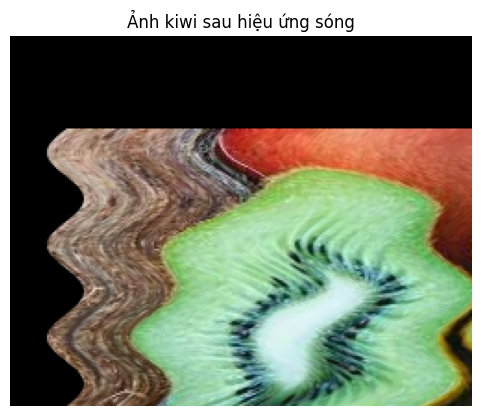

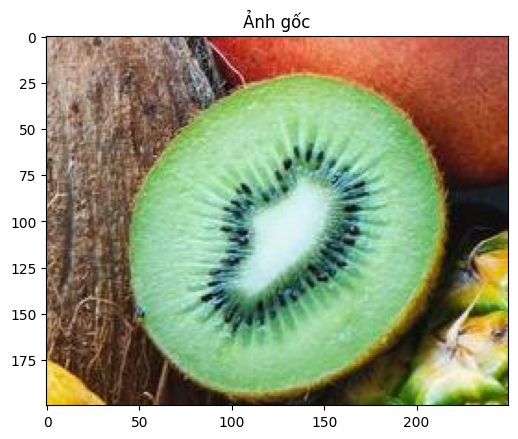

In [13]:
# Đọc ảnh quả kiwi 
data_image = iio.imread('exercise/kiwi_cut_bt01.jpg')

# Tịnh tiến ảnh 50pixel sang phải và 30pixel xuống dưới - shift(image, toa độ)
shift_kiwi = nd.shift(data_image, (50, 30, 0))  # dy, dx, chanel=0 để không dịch các kênh màu

# Áp dụng hiệu ứng sóng wawe effect
rows, cols, ch = data_image.shape # lấy kích thước ảnh: số dòng, cột, kệnh màu
# tạo lưới toạ độ x,y theo từng pixel
x, y = np.meshgrid(np.arange(cols), np.arange(rows)) 

# Tạo biến dnagj theo sóng sin trên trục y
# Tạo hiệu ứng sóng theo trục x: làm lệch toạ độ x theo sóg sin
# biê độ =10pixel, tần số 1 chu kỳ mỗi 50 dòng ảnhn
offset = 10 * np.sin(2 * np.pi * y / 50)

# Tính tọa độ mới sau khi áp dụng sóng
x_new = x + offset # lệch theo sóng
y_new = y           # giữ nguyên trục y

# Gom thành mảng toạ độ theo định dangj yêu cầu của map_coordinates
# dạng (2, H, W) với [0]=Y, [1]=X
coords = np.array([y_new, x_new])

# Tạo mảng rỗng cùng kích thucows ảnh để lưu kết quả
kiwi_wave = np.zeros_like(shift_kiwi)

# Biến đổi từng kênh màu riêng
# Duyệt qua từng kênh(R,G,B) và áp dụng map_coordiantes
for i in range(3):
    kiwi_wave[:, :, i] = nd.map_coordinates(
        shift_kiwi[:, :, i], # ảnh gốc từng kênh
        coords,              # toạ độ biến dạng
        order=1,             # nội suy bậc 1 (bilinear)
        mode='reflect'       # phản chiếu biên tranh mất dữ liệu
        )

# Lưu ảnh kết quả
output_path = "exercise/kiwi_wave.jpg"
iio.imwrite(output_path, kiwi_wave)
print(f"Đã lưu ảnh với hiệu ứng sóng: {output_path}")

# Hiển thị ảnh
plt.imshow(kiwi_wave)
plt.title("Ảnh kiwi sau hiệu ứng sóng")
plt.axis('off')
plt.show()
plt.imshow(kiwi_wave)
plt.imshow(data_image)
plt.title("Ảnh gốc")
plt.show()

Bài 2: 
Chọn quả đu đủ và dưa hấu từ google.
Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím.
Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.

Bài 3: 

Chọn ảnh núi và thuyền .
Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False).
Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay.
Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

Bài 4: 

Chọn ngôi chùa bất kì.
Phóng to ngôi chùa lên 5 lần.
Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa.
Lưu ảnh kết quả vào pagoda_warped.jpg.

Bài 5:

Tạo một chương trình menu tương tác cho phép người dùng chọn các phép biến đổi sau:
Tịnh tiến (hỏi số pixel di chuyển theo x và y).
Xoay (hỏi góc xoay và chọn reshape=True/False).
Phóng to/thu nhỏ (hỏi hệ số zoom).
Làm mờ Gaussian (hỏi giá trị sigma).
Biến đổi sóng (hỏi biên độ sóng).
Người dùng chọn ảnh từ 3 ảnh bất kì